In [96]:
import sklearn.linear_model as lm

In [97]:
#loading the Data

import pandas as pd

df = pd.read_csv('2014_Housing_Market_Analysis_Data_by_Zip_Code.csv' , engine='python')

df.describe() #will returns the quick stats such as count, mean, std (standard
#deviation) min, first quartile, median, third quartile, max on each column
#of the dataframe

df.cov()  #Covariance indicates how two variables are related. A positive
#covariance means the variables are positively related, while a negative
#covariance means the variables are inversely related. Drawback of covariance
#is that it does not tell you the degree of positive or negative relation

df.corr() #Correlation is another way to determine how two variables are
#related. In addition to telling you whether variables are positively or
#inversely related, correlation also tells you the degree to which the
#variables tend to move together. When you say that two items correlate, you
#are saying that the change in one item effects a change in another item. You
#ill always talk about correlation as a range between -1 and 1

df.dtypes

Zip Code                                                                         float64
Population below poverty level                                                     int64
Median household income                                                            int64
Non-White, Non-Hispanic or Latino                                                  int64
Hispanic or Latino, of any race                                                    int64
Population with disability                                                         int64
Unemployment                                                                       int64
Large households (5+ members)                                                      int64
Homes affordable to people earning less than $50,000                             float64
Rentals affordable to people earning less than $25,000                             int64
Rent-restricted units                                                              int64
Housing Choice Vouche

In [98]:
myCorr=df.corr()
myCorr

,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Rental units affordable to average teacher,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related
Zip Code,1.000000,-0.162301,0.092879,-0.039527,-0.145024,-0.051215,-0.402752,-0.215423,0.240109,-0.124844,...,0.194450,0.238158,0.066852,0.205648,0.016285,-0.512187,-0.058640,0.004331,-0.096373,0.159166
Population below poverty level,-0.162301,1.000000,-0.796246,0.205552,0.587313,0.289441,0.757198,0.232768,0.567512,0.622837,...,0.428272,0.591755,0.269310,0.499234,-0.323080,0.263685,-0.004765,0.568429,-0.408525,0.082770
Median household income,0.092879,-0.796246,1.000000,-0.260296,-0.652903,-0.553240,-0.736352,-0.118568,-0.624917,-0.584225,...,-0.713809,-0.620555,-0.616999,-0.695095,0.437598,-0.047587,-0.008350,-0.577613,0.417409,-0.362997
"Non-White, Non-Hispanic or Latino",-0.039527,0.205552,-0.260296,1.000000,0.135436,0.198121,0.372540,0.127109,0.411113,0.033621,...,0.197188,0.377463,0.153021,0.463326,0.112239,-0.027007,-0.051451,-0.012805,0.000819,0.289529
"Hispanic or Latino, of any race",-0.145024,0.587313,-0.652903,0.135436,1.000000,0.468693,0.647327,0.720872,0.811858,0.624703,...,0.594317,0.812507,0.392028,0.722220,-0.185222,-0.011030,-0.155203,0.179180,0.149139,0.508816
Population with disability,-0.051215,0.289441,-0.553240,0.198121,0.468693,1.000000,0.507502,0.070617,0.346770,0.589203,...,0.471081,0.324418,0.435250,0.398346,-0.492290,0.195742,0.442085,0.596231,-0.347306,0.147663
Unemployment,-0.402752,0.757198,-0.736352,0.372540,0.647327,0.507502,1.000000,0.355503,0.575568,0.591491,...,0.365674,0.577187,0.262543,0.596694,-0.250376,0.372026,-0.032690,0.437277,-0.231141,0.214114
Large households (5+ members),-0.215423,0.232768,-0.118568,0.127109,0.720872,0.070617,0.355503,1.000000,0.608847,0.298535,...,0.162184,0.622066,-0.000732,0.404682,0.194743,0.006433,-0.285936,-0.285764,0.561312,0.409063
"Homes affordable to people earning less than $50,000",0.240109,0.567512,-0.624917,0.411113,0.811858,0.346770,0.575568,0.608847,1.000000,0.333443,...,0.607300,0.994853,0.441959,0.811388,-0.130688,-0.117661,-0.343652,0.172848,0.063101,0.458473
"Rentals affordable to people earning less than $25,000",-0.124844,0.622837,-0.584225,0.033621,0.624703,0.589203,0.591491,0.298535,0.333443,1.000000,...,0.535217,0.342507,0.295644,0.340284,-0.340442,0.214065,0.276005,0.445078,-0.266447,0.227747


In [99]:
maxCorr=myCorr["Percentage of housing and transportation costs that is transportation-related"]
maxCorr

Zip Code                                                                         0.159166
Population below poverty level                                                   0.082770
Median household income                                                         -0.362997
Non-White, Non-Hispanic or Latino                                                0.289529
Hispanic or Latino, of any race                                                  0.508816
Population with disability                                                       0.147663
Unemployment                                                                     0.214114
Large households (5+ members)                                                    0.409063
Homes affordable to people earning less than $50,000                             0.458473
Rentals affordable to people earning less than $25,000                           0.227747
Rent-restricted units                                                            0.250622
Housing Ch

In [100]:
print(df.describe()["Median home value"])

count        37.000000
mean     259924.324324
std      140547.254618
min       54400.000000
25%      166200.000000
50%      233900.000000
75%      338300.000000
max      621900.000000
Name: Median home value, dtype: float64


In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
dfMain=df
df=train
print(len(test))
print(len(train))

8
29


In [102]:


x = df["Median home value"][:, np.newaxis] # this is the independent Variable
y = df["Percentage of housing and transportation costs that is transportation-related"]            # this is the dependent Variable

In [103]:
lr = lm.LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

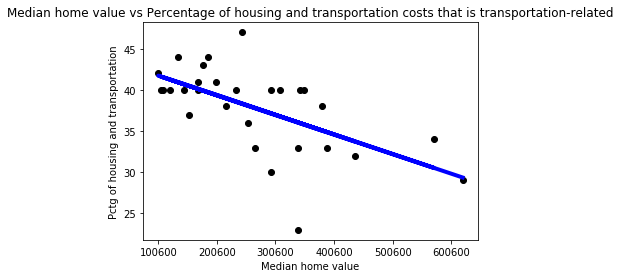

In [104]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=4)
plt.title('Median home value vs Percentage of housing and transportation costs that is transportation-related')
plt.ylabel('Pctg of housing and transportation')
plt.xlabel('Median home value')
plt.xticks(np.arange(min(x), max(x)+1, 100000))
plt.show()

In [105]:
plt.show()

In [109]:
test["predicted_value"]=lr.predict(test["Median home value"][:, np.newaxis])
test

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related,predicted_value
15,78729.0,8,57358,22,17,7,7,7,26.0,3,...,22.0,100,96.0,116,12,43,13,747,37,39.552587
6,78703.0,10,92606,9,9,6,4,4,3.0,11,...,2.0,92,13.0,7,65,104,67,629,25,29.311328
22,78742.0,37,34076,4,70,7,11,18,50.0,40,...,50.0,100,100.0,165,17,-37,3,747,43,42.839993
20,78739.0,1,126525,14,15,4,4,13,0.0,0,...,0.0,71,11.0,46,0,72,8,786,34,35.781248
28,78750.0,7,75958,16,16,9,6,6,19.0,2,...,15.0,99,51.0,104,20,64,21,747,33,36.911219
5,78702.0,33,34734,18,56,14,11,10,21.0,41,...,15.0,99,67.0,3,73,207,96,590,39,39.955467
21,78741.0,40,30183,16,62,9,9,10,76.0,15,...,76.0,100,93.0,45,28,58,80,668,43,41.271383
24,78745.0,16,49243,7,40,11,7,6,33.0,8,...,29.0,99,96.0,73,30,83,76,668,35,40.174786
